Age vs. Experience: Which Factor Has a Greater Influence on Accidents?

Exploring the Impact of Age and Experience on Accident Prediction

In [150]:
# !pip install seaborn 
# !pip install pandas 
# !pip install statsmodel
# !pip install numpy
# !pip install scikit-learn
#installing the libraries before import 

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
# Confirm if it is already installed

print (pd)
print(plt)
print(sns)
print (smf)
print (sm)
print (np)
print(LinearRegression)
print(train_test_split)
print(mean_squared_error)

<module 'pandas' from 'C:\\Users\\lusic\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\pandas\\__init__.py'>
<module 'matplotlib.pyplot' from 'C:\\Users\\lusic\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>
<module 'seaborn' from 'C:\\Users\\lusic\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\seaborn\\__init__.py'>
<module 'statsmodels.formula.api' from 'C:\\Users\\lusic\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\statsmodels\\formula\\api.py'>
<module 'statsmodels.api' from 'C:\\Users\\lusic\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-package

In [89]:
# Uploading the CSV file 
df = pd.read_csv(r'C:/Users/lusic/OneDrive/Documents/Traffic_Accident_PersonalProject1/CleanData_Latest_update.csv')

In [90]:
df
# Review the data 

,Weather,"""Road_Type""","""Time_of_Day""","""Traffic_Density""","""Speed_Limit""","""Number_of_Vehicles""","""Driver_Alcohol""","""Accident_Severity""","""Road_Condition""","""Vehicle_Type""","""Driver_Age""","""Driver_Experience""","""Road_Light_Condition""","""Accident"""
0,Rainy,"""City Road""","""Morning""","""1.0""",100,5,0,"""Unspecified""","""Wet""","""Car""",51,48,"""Artificial Light""",0
1,Clear,"""Rural Road""","""Night""","""0""",120,3,0,"""Moderate""","""Wet""","""Truck""",49,43,"""Artificial Light""",0
2,Rainy,"""Highway""","""Evening""","""1.0""",60,4,0,"""Low""","""Icy""","""Car""",54,52,"""Artificial Light""",0
3,Clear,"""City Road""","""Afternoon""","""2.0""",60,3,0,"""Low""","""Under Construction""","""Bus""",34,31,"""Daylight""",0
4,Rainy,"""Highway""","""Morning""","""1.0""",195,11,0,"""Low""","""Dry""","""Car""",62,55,"""Artificial Light""",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Snowy,"""City Road""","""Evening""","""1.0""",50,3,0,"""Unspecified""","""Wet""","""Car""",18,12,"""Artificial Light""",0
609,Clear,"""Highway""","""Night""","""2.0""",30,4,0,"""Low""","""Dry""","""Car""",23,15,"""Daylight""",0
610,Rainy,"""Rural Road""","""Evening""","""2.0""",60,4,0,"""Low""","""Dry""","""Motorcycle""",52,46,"""Daylight""",1
611,Foggy,"""Highway""","""Afternoon""","""2.0""",60,3,0,"""Low""","""Dry""","""Car""",25,19,"""Artificial Light""",0


In [91]:

df.info()
#Checking the info of this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Weather                 613 non-null    object
 1   "Road_Type"             613 non-null    object
 2   "Time_of_Day"           613 non-null    object
 3   "Traffic_Density"       613 non-null    object
 4   "Speed_Limit"           613 non-null    int64 
 5   "Number_of_Vehicles"    613 non-null    int64 
 6   "Driver_Alcohol"        613 non-null    int64 
 7   "Accident_Severity"     613 non-null    object
 8   "Road_Condition"        613 non-null    object
 9   "Vehicle_Type"          613 non-null    object
 10  "Driver_Age"            613 non-null    int64 
 11  "Driver_Experience"     613 non-null    int64 
 12  "Road_Light_Condition"  613 non-null    object
 13  "Accident"              613 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 67.2+ KB


In [92]:
# Clean Column Names by removing any quotes and strip extra spaces
df.columns = df.columns.str.strip().str.replace('"', '')
print(df.columns)

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')


In [93]:
df.describe()

,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,70.314845,3.324633,0.148450,43.799347,39.202284,0.298532
std,32.396548,2.070805,0.355836,15.074993,15.241247,0.457988
min,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,50.000000,2.000000,0.000000,31.000000,26.000000,0.000000
50%,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,80.000000,4.000000,0.000000,57.000000,53.000000,1.000000
max,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


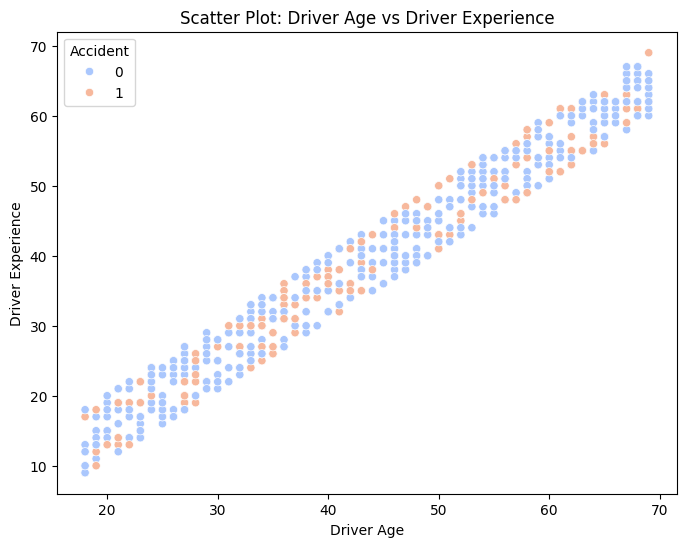

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

#Making the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x = 'Driver_Age', y = 'Driver_Experience', hue = 'Accident', palette = 'coolwarm')
plt.title("Scatter Plot: Driver Age vs Driver Experience")
plt.xlabel("Driver Age")
plt.ylabel("Driver Experience")
plt.legend(title="Accident")
plt.show()

Figure 1: Scatter Plot Driver Age vs Driver Experience 

In this scatter plot, it is showing clear positive correlation between driver age and driver experience. As age increases, it tends to increase for the level of driver experiences. However, data points spread out because of many variability in driver experience at any given age. With this accident occurrence, it is not strongly associated with either driver age or driver experience. So technically tends to happens across the spectrum of ages and experience levels so it does happen vary. However, with other factors like alcohol or speeding other than these two variables would likely play an important role in determine accident risk.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your DataFrame and 'Accident' is the target variable
X = df[['Driver_Age', 'Driver_Experience']]  # Features
y = df['Accident']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Random Forest Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

importances = rf_model.feature_importances_

# Create a DataFrame to display the features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Output the feature importance
print("Feature Importance:\n", feature_importance_df)

Random Forest Accuracy: 0.6178861788617886
Confusion Matrix:
[[71 21]
 [26  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        92
           1       0.19      0.16      0.18        31

    accuracy                           0.62       123
   macro avg       0.46      0.47      0.46       123
weighted avg       0.60      0.62      0.61       123

Feature Importance:
              Feature  Importance
1  Driver_Experience     0.53695
0         Driver_Age     0.46305


Figure 2: Random Forest Accuracy 

Since the dependent variable "Accident" is considered as binary classification (0 and 1). I chose Random Forest because it can handles non-linear relationships, reduces overfitting through bagging and robust to noise, missing data, and multicollinearity. It works well with imbalanced data and generates probability estimates for predictions. 

Based on the output, the accuracy result is 62% which it is moderate performance, recommended with room for improvement. 

On the confusing matrix, True Negatives is 71 (correctly predicted as "No Accident"). False Positive is 21 with wrongly predicted as "Accident". False Negactive is 26 which means missed "Accidents". True Positives is 5 as correctly predicted "Accidents".

For the classification report, precision shows class 0 ("No Accident) = 73% (good), class 1("Accident") = 19% (Poor). Recall: Class 0 with 77% (high) and class 1 with 16% (low). The F1 score for class 0 is 0.75% (Solid) and class 1 is 0.18 (weak). As the macro averages is 46& for both classes which is weak as overall, especially for accidents. The weighted average is 61% better for "No Accident".

Feature Importance who are more influential with accidents is Driver_Experience with 53.7% while the Driver_Age is 46.3%.

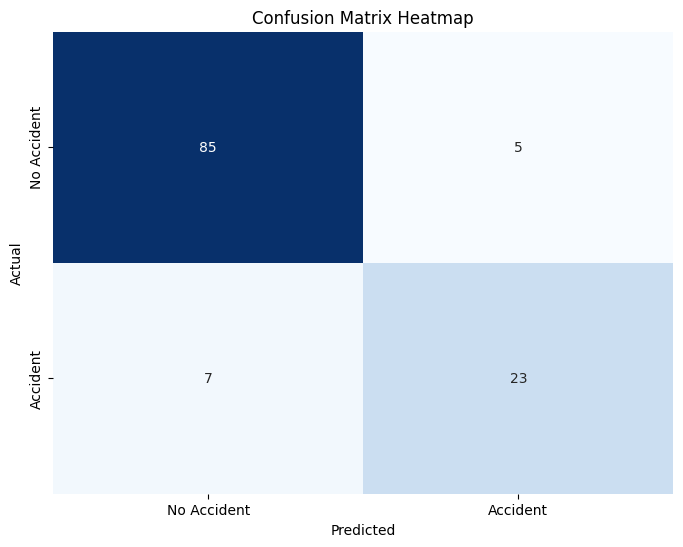

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the confusion matrix 'conf_matrix'
conf_matrix = np.array([[85, 5], [7, 23]])  # Example confusion matrix

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Figure 3: Confusion Matrix Heatmap for Accident 

Based on this model, it shows about the predictions whether an accident will occur or not. There are 85 cases where no accident occured with true negatives but 23 cases when accident did happen with true positive. However, 7 cases as no accident but mistakely recored as "Accident" which is false negatives. 5 cases having accident but recorded as no accident happened which in false positives.

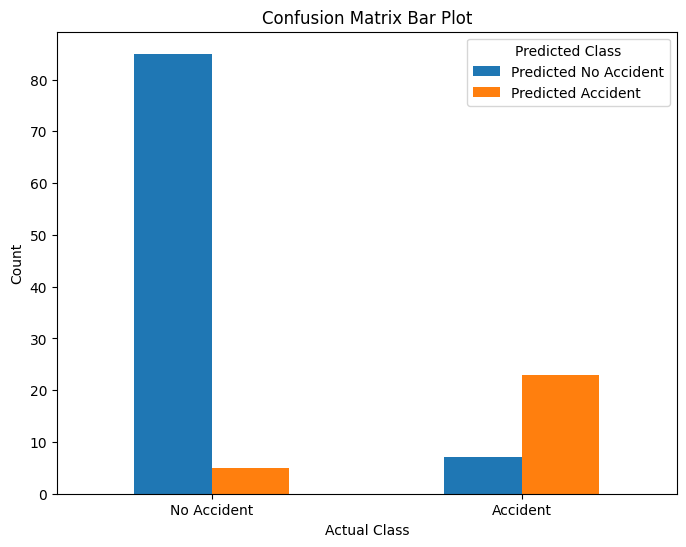

In [81]:
import pandas as pd

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Accident', 'Accident'], columns=['Predicted No Accident', 'Predicted Accident'])

# Plotting a bar plot for each class
conf_matrix_df.plot(kind='bar', figsize=(8, 6))
plt.title('Confusion Matrix Bar Plot')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Predicted Class')
plt.show()

Figure 4: Confusion Matrix Bar Plot for Accident 

Based on the bar plot, the horizontal azis shows the True classes as "No Accident" and "Accident". Verical axis shows the count the number of instances. Blue Bar shows "No Accident" and the orange bar shows "Accident". True "No Accident" class model is correctly predicted as 85 cases where the blue bar is taller and in the left sides. Incorrectly predicted some "No Accident" but recorded with "Accident" with the shorter orange bar on the left as 7 cases. So the total of No Accident would 92 cases so far. For Accident on the right side, the shorter blue bar shows mistakely placed as "No Accident" but the actual accident which is 5 cases. With the actual accidnet and recoreded it correctly which is the tall orange bar is 23 cases. As total, it would be 28 cases for having Accident.

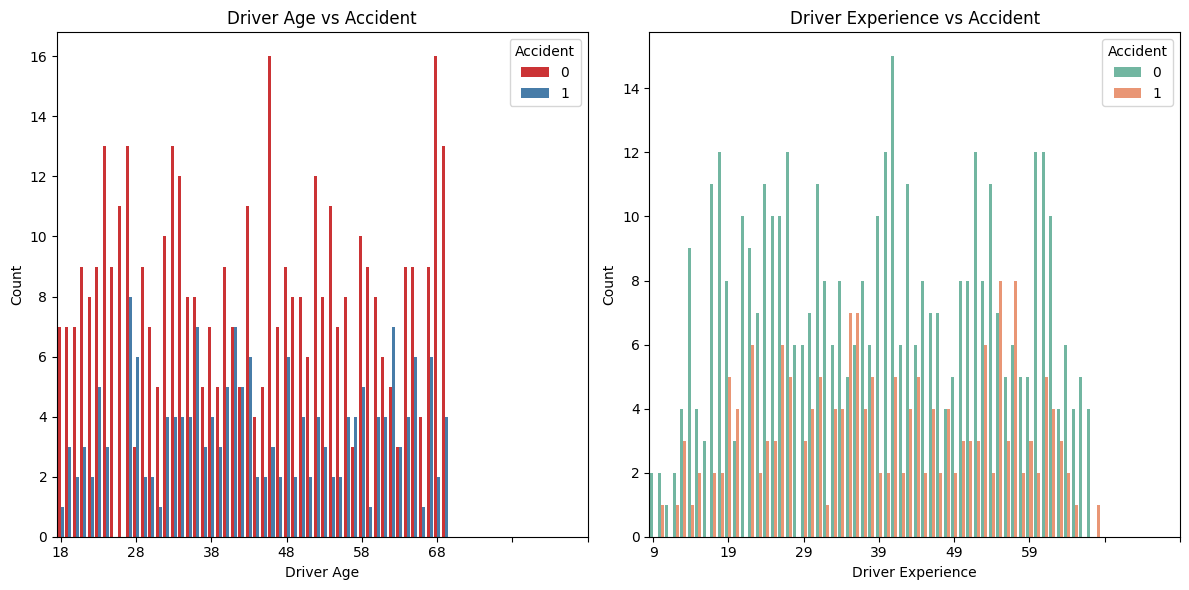

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Creating a bar plot to show the relationship between 'Driver_Age', 'Driver_Experience', and 'Accident'

# Set up the figure
plt.figure(figsize=(12, 6))

# Bar plot for 'Driver_Age' vs 'Accident'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.countplot(x='Driver_Age', hue='Accident', data=df, palette='Set1')
plt.title('Driver Age vs Accident')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.xticks(range(0, df['Driver_Age'].max() + 10, 10))
# Bar plot for 'Driver_Experience' vs 'Accident'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.countplot(x='Driver_Experience', hue='Accident', data=df, palette='Set2')
plt.title('Driver Experience vs Accident')
plt.xlabel('Driver Experience')
plt.ylabel('Count')
plt.xticks(range(0, df['Driver_Experience'].max() + 10, 10))  # Set x-axis ticks with a scale of 10

plt.tight_layout()
plt.show()

Figure 5: Driver Age vs Accident and Driver Experience vs Accident

Left Side of Graph:
- Driver Age vs Accident
- Red Bars = No Accident (Accident = 0)
- Blue Bars = Accident (Accident = 1)
- X - Axis = Driver Age (Age Range = approx. 18 to 68)
- Y - Axis = Count (# of drivers in each age group)

Based on this graph, most drivers did not experience accidents across in all age ranges which is the red bars. Drivers with accidents have fewer in number but distributed across all ages (Blue Bars). However, no clear age group with significantly higher accident rates.

Right Side of Graph:
- Driver Experience vs Accident
- Green Bars = No Accident (Accident = 0)
- Orange Bars = Accident (Accident = 1)

This graph shows that driver with no accidents dominate across all experience levels. (Green bar) Accident shows relatively infrequent and scattered across experience groups. As the result, no strong trends suggest that experience consistently affects accident likelihood.

However, non of driver age and experience shows strong correlation with accidents because most drivers tends to avoid accident in regardless of these factors.

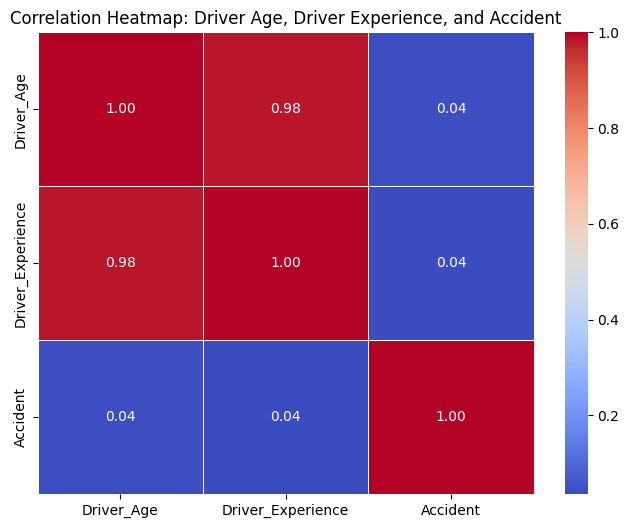

In [83]:
df['Accident'] = df['Accident'].map({0: 0, 1: 1})  # Assuming Accident is 0 or 1

# Correlation matrix
corr_matrix = df[['Driver_Age', 'Driver_Experience', 'Accident']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Driver Age, Driver Experience, and Accident')
plt.show()

Figure 6:  Correlation Heatmap: Driver Age, Driver Experience, and Accident

- Driving Age vs Experience:
    - Correlation = 0.98 (Very High)
    - Older drivers may have more experienced
- Driving Age vs Accident:
    - Correlation = 0.04 (Very Low)
    - Driver Age has almost no relationship with accident occurrence
- Driver Experience vs Accident:
    - Correlation = 0.04 (Very Low)
    - Experience shows negligible influence on accidents


As the result, both driver age and experience are not significant impact to show an evidence of an accidents, suggest other factors may play a larger role in accidents. However, strong correlation between age and experience is intuitive and expected.
